In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv(r'C:\Users\Lenovo\Downloads\Social_Network_Ads.csv')
x = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 4].values

In [3]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
x[:,0]=lb.fit_transform(x[:,0])

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf=RandomForestClassifier(n_estimators=10000,criterion='entropy')

In [67]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
y_pred=rf.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred)*100,"%")

Accuracy Score:  92.5 %


In [71]:
from sklearn.metrics import confusion_matrix

In [59]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=["Prediction -0","Prediction -1"],index=["Actual -0","Actual -1"])

,Prediction -0,Prediction -1
Actual -0,30,2
Actual -1,1,7


In [60]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

In [52]:
print("AUC:",roc_auc)

AUC: 0.90625


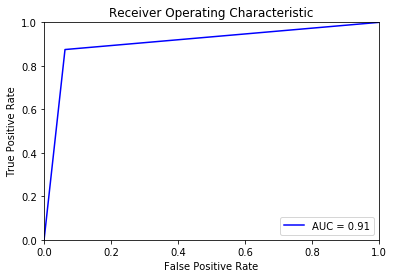

In [43]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()